In [26]:
import pandas as pd
import sqlite3
db_file = fr"C:\Users\halik\OneDrive\development\github\sws\code\parametry8.db"
conn = sqlite3.connect(db_file, isolation_level=None, detect_types=sqlite3.PARSE_COLNAMES)
db_df = pd.read_sql_query("SELECT * FROM nutneParametry", conn)
db_df.to_csv('parametry8.csv', index=False)


r*r pro linearni regresi je 0.5360839919861069


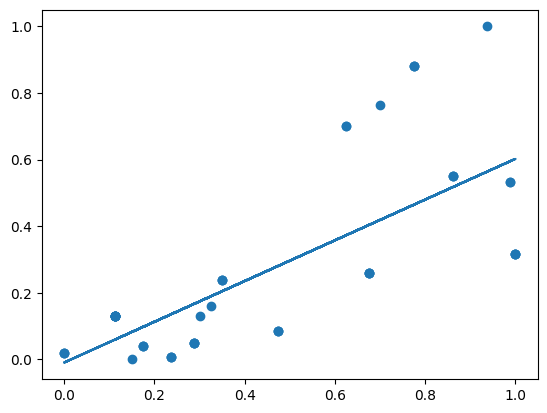

In [29]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#get data
df = pd.read_csv(fr"C:\Users\halik\OneDrive\development\github\sws\code\parametry8.csv")
x = df["Užitná"]
y = df["Cena"]

# normalize data
# copy the data
df_min_max_scaled = df.copy()
columns = ["Užitná", "Cena"]
for column in columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	
# view normalized data
#display(df_min_max_scaled)
df_normalized = df_min_max_scaled

def linear_regresion(x):
    return slope * x + intercept

#draw linear regresion

x = df_normalized["Užitná"]
y = df_normalized["Cena"]
plt.scatter(x, y)
slope, intercept, r, p, std_err = stats.linregress(x, y)
mymodel = list(map(linear_regresion, x))
plt.plot(x, mymodel)
print(f"r*r pro linearni regresi je {r*r}")
plt.show()



In [57]:
import pandas as pd
import numpy as np
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split

# Load the data into a pandas DataFrame
df = pd.read_csv(fr'C:\Users\halik\OneDrive\development\github\sws\code\repo.csv', delimiter=',')

# Transform datum column into numerical index (line number)
df['datum'] = range(1, len(df)+1)

# Define the features and target
features = ['datum', 'repo', 'cena', 'doba', 'nove', "zobrazeni"]
target = ['aktivni']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Fit an OLS regression model to the training data
model = OLS(y_train, X_train).fit()

# Print the summary of the model
print(model.summary())

# Predict the target for the test data
y_pred = model.predict(X_test)

# Evaluate the model by calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis=0)
print("Mean Squared Error:", mse)


df = pd.read_csv(fr'C:\Users\halik\OneDrive\development\github\sws\code\repo.csv')
df_train = df.iloc[:-5]  # split the data into train and test sets

# Create a dataframe for the future months
future_months = pd.DataFrame({'datum': pd.date_range(start=df_train['datum'].iloc[-1], periods=5, freq='M'),
                                'repo': [0, 0, 0, 0, 0],
                                'cena': [0, 0, 0, 0, 0],
                                'doba': [0, 0, 0, 0, 0],
                                'nove': [0, 0, 0, 0, 0],
                                'zobrazeni': [0, 0, 0, 0, 0]})

# Convert the integer values in 'datum' column to a pandas Timedelta
future_months['datum'] = (future_months['datum'] - pd.Timestamp("1970-01-01")) / np.timedelta64(1, 'D')

future_months_pred = model.predict(future_months)
print("Prediction for future months:", future_months_pred)


                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1765.
Date:                Sun, 29 Jan 2023   Prob (F-statistic):                    2.68e-74
Time:                        18:45:28   Log-Likelihood:                         -600.08
No. Observations:                  76   AIC:                                      1212.
Df Residuals:                      70   BIC:                                      1226.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model

#get data
df = pd.read_csv(fr"C:\Users\halik\OneDrive\development\github\sws\code\parametry8.csv")
features = ['Užitná', 'Podlahová', 'Podlaží', 'Energetika']
target = 'Cena'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
print(model.coef_)
print(model.score(X, y))


[  -6663.70652363  101524.54923574  128665.83142936 -104449.29600952]
0.5961892378301946
